 #                     COVID ANALYSIS AND PREDICTION

##### Data Analysis By: Abhijeet Srivastav
       CEO, Techneophyte

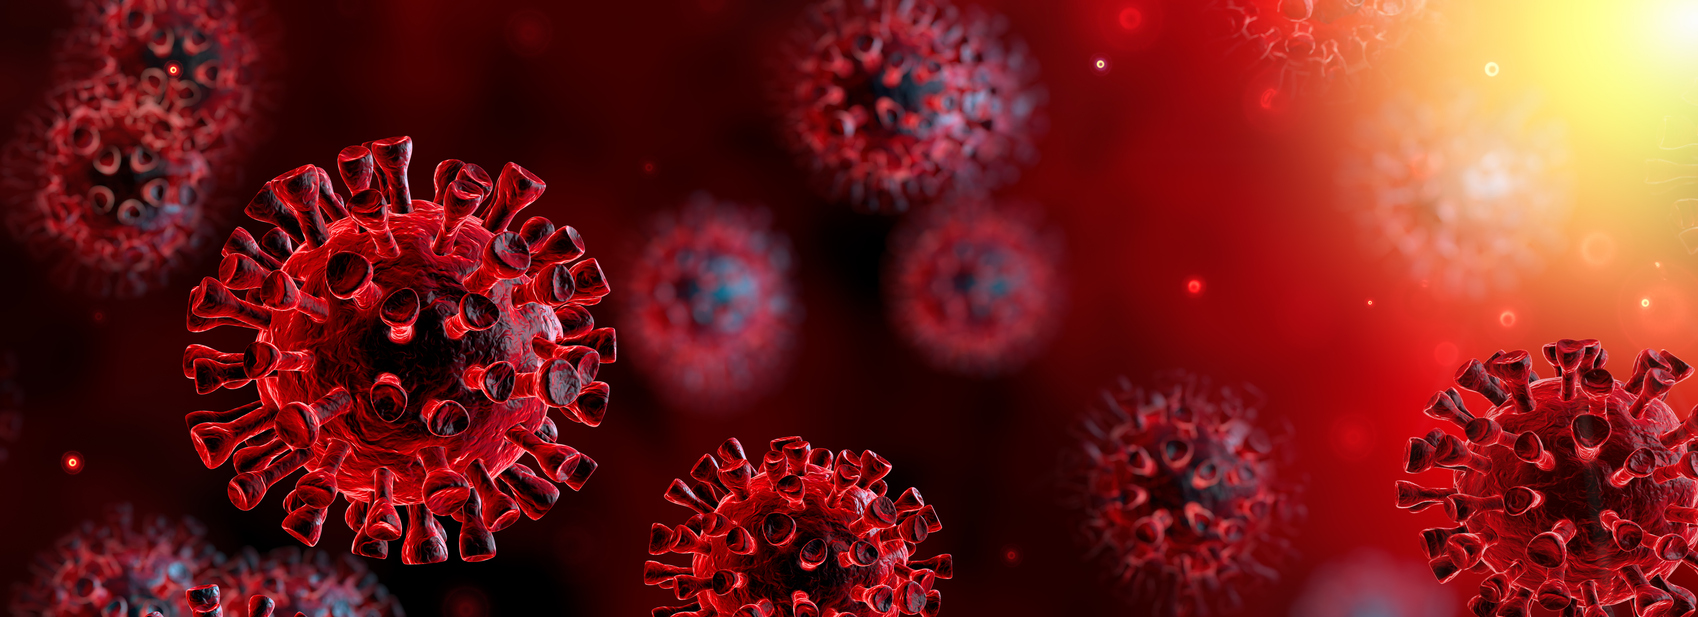

## Installing The Required Modules

Connect to Network and Run the Installation shell.

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib

If matplotlib throws error while installation try this command at place of import matplotlib.

import sys !{sys.executable} -m pip install --user matplotlib

## Importing Modules

In [2]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Data Sets

In [3]:
IndividualCases_df = pd.read_csv('indivdual.csv')
CovidIndia_df = pd.read_csv('covidindia.csv')
IndianStatesPopulationArea_df = pd.read_excel('Indian States Population and Area.xlsx')

## Taking a Look at Data Sets


In [4]:
# Looking at the head of Covid India Data Set
CovidIndia_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [5]:
# Looking at the tail of Covid India Data Set
CovidIndia_df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1313,1314,25/04/20,5:00 PM,Telengana,-,-,253,26,984
1314,1315,25/04/20,5:00 PM,Tripura,-,-,1,0,2
1315,1316,25/04/20,5:00 PM,Uttarakhand,-,-,25,0,48
1316,1317,25/04/20,5:00 PM,Uttar Pradesh,-,-,248,26,1778
1317,1318,25/04/20,5:00 PM,West Bengal,-,-,103,18,571


In [6]:
# Looking at the number of rows and columns of Covid India Data Set
CovidIndia_df.shape

(1318, 9)

So, we can see that Covid India Data Set has 1317 entries and the entries are date wise.
The data has record from 30/01/20 to 25/04/20.
The structure of this data set is 1318 rows and 9 columns.

Now to add the total number of cases upto the date. We will load the cases on the
latest date i.e is 25/04/20 and then sum them.

In [7]:
CovidIndia_df_Latest = CovidIndia_df[CovidIndia_df['Date'] == '25/04/20']
CovidIndia_df_Latest.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1286,1287,25/04/20,5:00 PM,Andaman and Nicobar Islands,-,-,11,0,27
1287,1288,25/04/20,5:00 PM,Andhra Pradesh,-,-,171,31,1061
1288,1289,25/04/20,5:00 PM,Arunachal Pradesh,-,-,1,0,1
1289,1290,25/04/20,5:00 PM,Assam,-,-,19,1,36
1290,1291,25/04/20,5:00 PM,Bihar,-,-,46,2,228


In [8]:
# Now summing up the cases
CovidIndia_df_Latest['Confirmed'].sum()

24893

So, we found that total number of cases upto 25/04/20 are 24893.

## Analysing State Wise Data

**State wise Confirmed Cases**

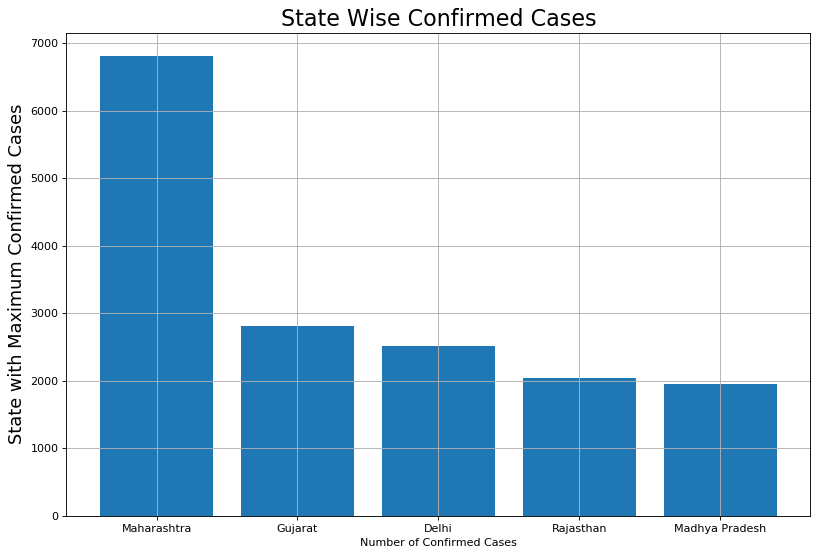

In [9]:
# Arranging the data In Confirmed Column in ascending order
CovidIndia_df_Latest = CovidIndia_df_Latest.sort_values(by=['Confirmed'],ascending=False)

# Drawing the figure
figure = plt.figure(figsize=(12,8), dpi=80)

# Loading data in X and Y axis list
X_AXIS = CovidIndia_df_Latest['State/UnionTerritory'][:5]
Y_AXIS = CovidIndia_df_Latest['Confirmed'][:5]

# Ploting the Bar Graph
plt.bar(X_AXIS,Y_AXIS)

# Giving the Labels 
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('State with Maximum Confirmed Cases', size=16)
plt.title('State Wise Confirmed Cases', size=20)
plt.grid(True)

# Showing the Graph
plt.show()

**State wise deaths**

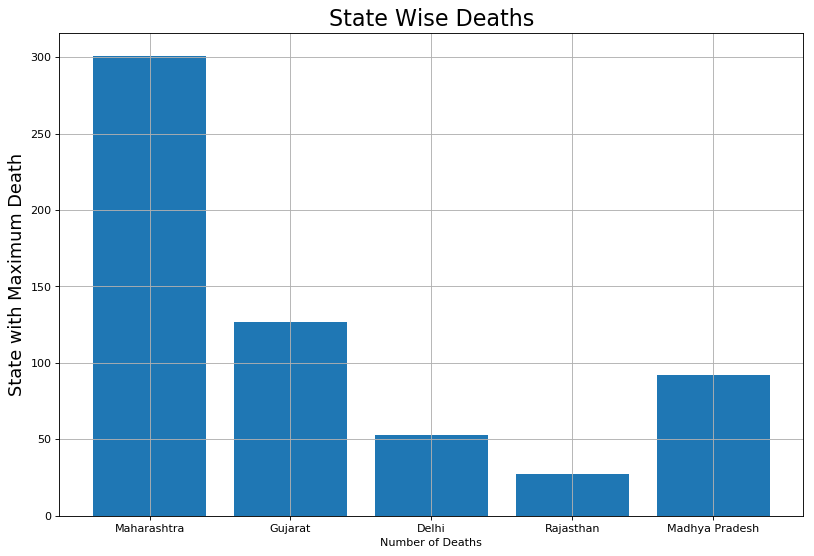

In [10]:
# Arranging the data In Confirmed Column in ascending order
CovidIndia_df_Latest = CovidIndia_df_Latest.sort_values(by=['Confirmed'],ascending=False)

# Drawing the figure
figure = plt.figure(figsize=(12,8), dpi=80)

# Loading data in X and Y axis list
X_AXIS = CovidIndia_df_Latest['State/UnionTerritory'][:5]
Y_AXIS = CovidIndia_df_Latest['Deaths'][:5]

# Ploting the Bar Graph
plt.bar(X_AXIS,Y_AXIS)

# Giving the Labels 
plt.xlabel('Number of Deaths')
plt.ylabel('State with Maximum Death', size=16)
plt.title('State Wise Deaths', size=20)
plt.grid(True)

# Showing the Graph
plt.show()

## Cases Per 10 million

This data set gives the detail of the aadhar assigned and area per sq km of each state.

The number of Aadhaar cards assigned in each state is a good measure or estimate of the population figure in each state. I decided to use this figure since the official census taken by the Government of India was last done in 2011 and is too huge a gap to be used. I also decided against taking various projected figures for population based on projections of previous census.

Now we will renam number of aadhars as population measure.


In [11]:
# Looking at the head of the Area and Aadhar Assigned data set
IndianStatesPopulationArea_df.head()

,State,Aadhaar assigned as of 2019,Area (per sq km)
0,Delhi,21763471,1483
1,Haryana,28941133,44212
2,Kerala,36475649,38852
3,Himachal Pradesh,7560770,55673
4,Punjab,30355185,50362


In [12]:
# Looking at the tail of the Area and Aadhar Assigned data set
IndianStatesPopulationArea_df.tail()

,State,Aadhaar assigned as of 2019,Area (per sq km)
32,Jammu & Kashmir,10436172,222236
33,Ladakh,210156,59146
34,Nagaland,1262729,16579
35,Meghalaya,978281,22429
36,Assam,6755448,78438


In [13]:
# Looking at the structure of the Area and Aadhar Assigned data set
IndianStatesPopulationArea_df.shape

(37, 3)

Now, we got that this data set contains values of 36 states.
And this data set has 3 columns State, Aadhaar Assigned, Area per (sq km) 
as well as 37 rows respectively.
 
Now we are going to load the States and rename Aadhar assigned as Population in a new data frame.

In [14]:
IndianStates_df = IndianStatesPopulationArea_df[['State', 'Aadhaar assigned as of 2019']]
IndianStates_df.columns = ['State/UnionTerritory','Population']

In [15]:
# Checking the head of new data frame
IndianStates_df.head()

,State/UnionTerritory,Population
0,Delhi,21763471
1,Haryana,28941133
2,Kerala,36475649
3,Himachal Pradesh,7560770
4,Punjab,30355185


As we can see the head aadhaar assigned has been changed to Population.

Now, we will merge our Population Data set with our main data set CovidIndia to get insight on cases per 10 million and this parameter is better because population of diffrent states vary much.

In [16]:
CovidIndia_df_Million = pd.merge(CovidIndia_df_Latest, IndianStates_df,on='State/UnionTerritory')

CovidIndia_df_Million['Cases/10million'] = (CovidIndia_df_Million['Confirmed']/CovidIndia_df_Million['Population'])*10000000

Now, seeing the newly created data frame.

In [17]:
# Checking the head of CovidIndia_df_Million data frame
CovidIndia_df_Million.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Population,Cases/10million
0,1305,25/04/20,5:00 PM,Maharashtra,-,-,957,301,6817,114063427,597.649937
1,1296,25/04/20,5:00 PM,Gujarat,-,-,265,127,2815,62097024,453.322852
2,1294,25/04/20,5:00 PM,Delhi,-,-,857,53,2514,21763471,1155.146622
3,1312,25/04/20,5:00 PM,Rajasthan,-,-,230,27,2034,68936999,295.052008
4,1304,25/04/20,5:00 PM,Madhya Pradesh,-,-,210,92,1952,74770270,261.066330


In [18]:
# Checking the tail of CovidIndia_df_Million data frame
CovidIndia_df_Million.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Population,Cases/10million
25,1295,25/04/20,5:00 PM,Goa,-,-,7,0,7,1587012,44.108047
26,1306,25/04/20,5:00 PM,Manipur,-,-,2,0,2,2515724,7.949998
27,1315,25/04/20,5:00 PM,Tripura,-,-,1,0,2,3672693,5.445595
28,1308,25/04/20,5:00 PM,Mizoram,-,-,0,0,1,1089577,9.177874
29,1289,25/04/20,5:00 PM,Arunachal Pradesh,-,-,1,0,1,1229964,8.130319


As we can see their are null values represented by '-'.
In order to do further analysis on our data we need to remove these null values
And after that arrange these values in ascending order.

In [19]:
# Replacing Null
CovidIndia_df_Million.fillna(0, inplace=True)

# Sorting the Data frame
CovidIndia_df_Million.sort_values(by='Cases/10million', ascending=False)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Population,Cases/10million
2,1294,25/04/20,5:00 PM,Delhi,-,-,857,53,2514,21763471,1155.146622
22,1303,25/04/20,5:00 PM,Ladakh,-,-,14,0,20,210156,951.673995
0,1305,25/04/20,5:00 PM,Maharashtra,-,-,957,301,6817,114063427,597.649937
1,1296,25/04/20,5:00 PM,Gujarat,-,-,265,127,2815,62097024,453.322852
3,1312,25/04/20,5:00 PM,Rajasthan,-,-,230,27,2034,68936999,295.052008
4,1304,25/04/20,5:00 PM,Madhya Pradesh,-,-,210,92,1952,74770270,261.066330
8,1314,25/04/20,5:00 PM,Telengana,-,-,253,26,984,39184011,251.122837
21,1292,25/04/20,5:00 PM,Chandigarh,-,-,15,0,28,1131522,247.454314
6,1313,25/04/20,5:00 PM,Tamil Nadu,-,-,866,22,1755,72344821,242.588201
7,1288,25/04/20,5:00 PM,Andhra Pradesh,-,-,171,31,1061,49145456,215.889746


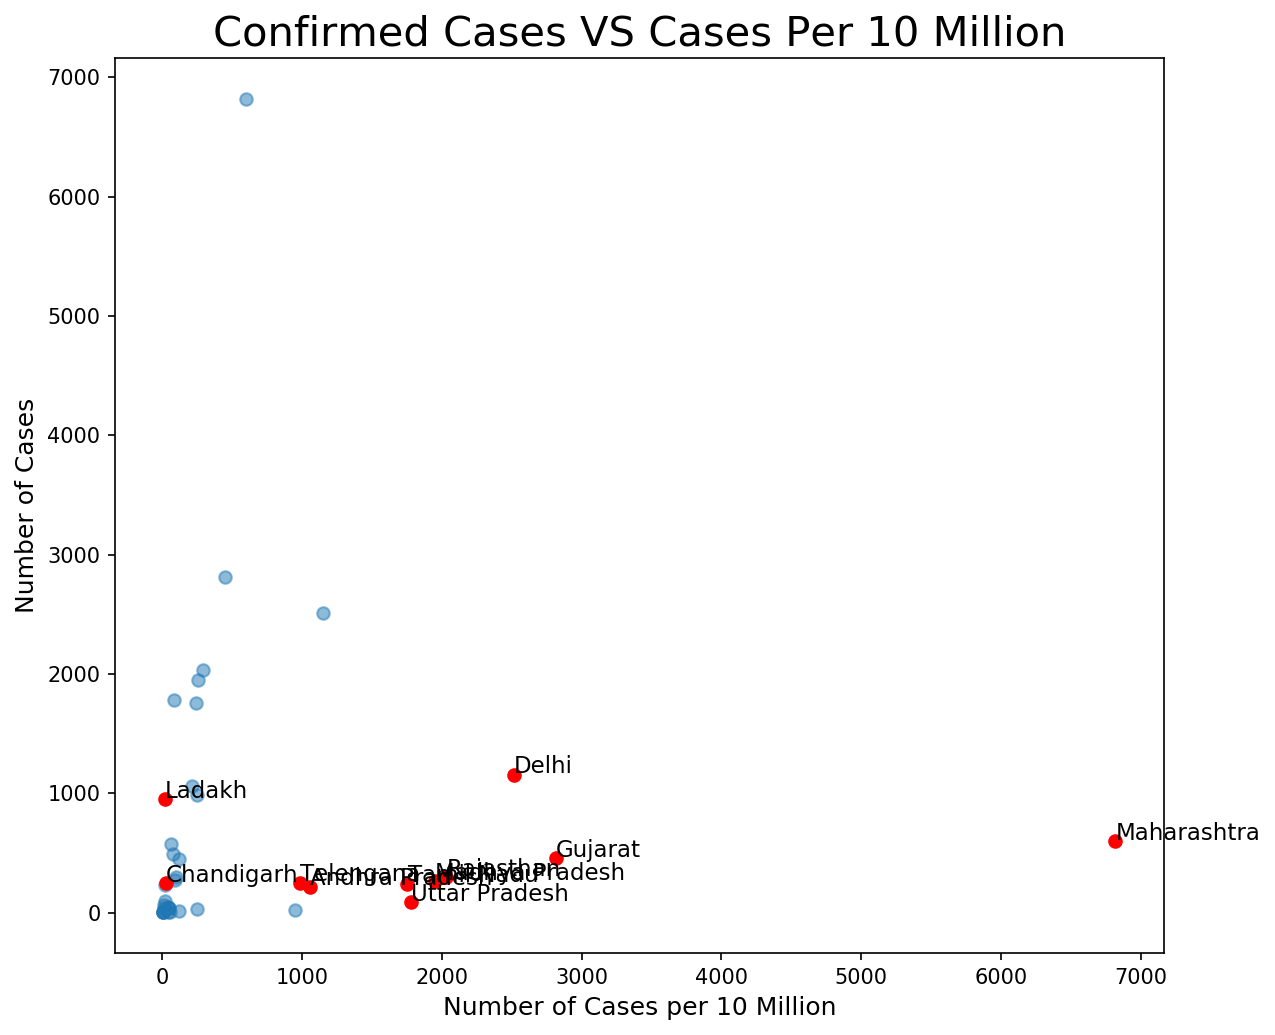

In [61]:
# Loading data from keys into variables with less cases
VARIATE_X = CovidIndia_df_Million['Cases/10million']
VARIATE_Y = CovidIndia_df_Million['Confirmed']

# Loading data from keys into new data frame with high casses
df = CovidIndia_df_Million[(CovidIndia_df_Million['Confirmed'] >= 1000) | 
                          (CovidIndia_df_Million['Cases/10million'] >= 200)]

# Loading data from keys into variables from new data frame with high cases
VARIATE_A = df['Confirmed']
VARIATE_B = df['Cases/10million']

# Drawing the figure
plt.figure(figsize=(8,7),dpi=150)

# Plotting the graph with low cases
plt.scatter(VARIATE_X, VARIATE_Y,alpha=0.5)

# Plotting the graph with high cases
plt.scatter(VARIATE_A, VARIATE_B, color='red')
# Labeling the graph
plt.title('Confirmed Cases VS Cases Per 10 Million', size=20)
plt.xlabel('Number of Cases per 10 Million', size=12)
plt.ylabel('Number of Cases', size=12)

# Annotating the graph
for i in range(df.shape[0]):
    plt.annotate(df['State/UnionTerritory'].tolist()[i], xy=(df['Confirmed'].tolist()[i], df['Cases/10million'].tolist()[i]),
                xytext = (df['Confirmed'].tolist()[i]+1.0, df['Cases/10million'].tolist()[i]+12.0), size=11)
plt.tight_layout()
plt.show()

We can see that  Maharashtra, Gujarat, Delhi, Rajasthan and Madhya Pradesh are badly hit indeed
even if we take population as parameter.
And these states are being followed up by Uttar Pradesh, Tamil Nadu, Andhra and 
Chandigarh.

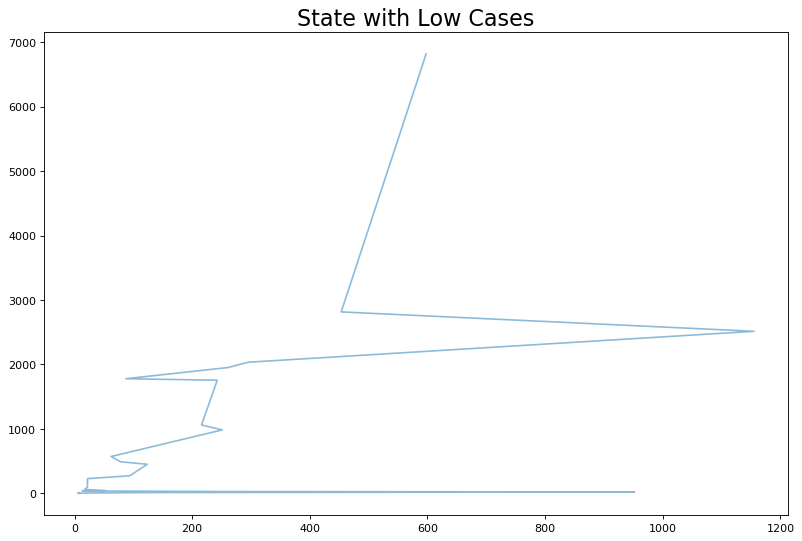

In [31]:
# Loading data from keys into variables with less cases
VARIATE_X = CovidIndia_df_Million['Cases/10million']
VARIATE_Y = CovidIndia_df_Million['Confirmed']

# Drawing the figure
plt.figure(figsize=(12,8), dpi=80)

# Plotting the graph with low cases
plt.plot(VARIATE_X, VARIATE_Y,alpha=0.5)

# Labeling the graph
plt.title('State with Low Cases', size=20)

plt.show()

**States with High Cases**

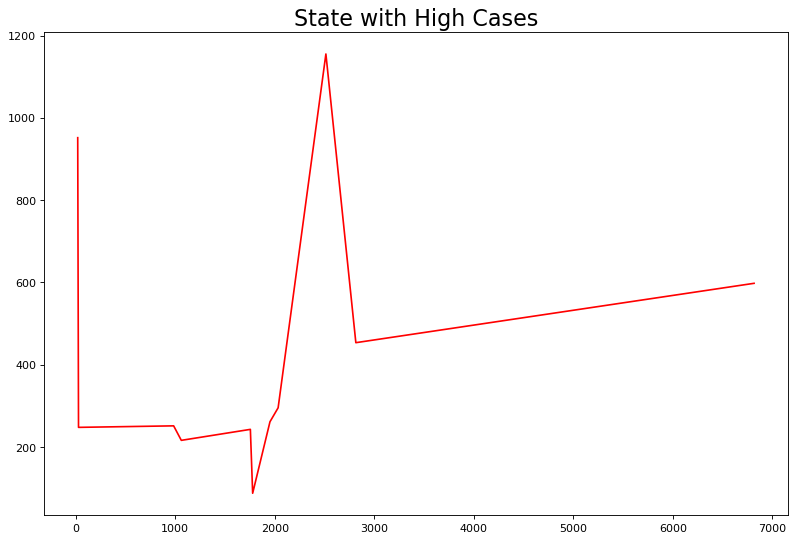

In [32]:

# Loading data from keys into new data frame with high casses
df = CovidIndia_df_Million[(CovidIndia_df_Million['Confirmed'] >= 1000) | 
                          (CovidIndia_df_Million['Cases/10million'] >= 200)]

# Loading data from keys into variables from new data frame with high cases
VARIATE_A = df['Confirmed']
VARIATE_B = df['Cases/10million']

# Drawing the figure
plt.figure(figsize=(12,8), dpi=80)

# Plotting the graph with low cases
plt.plot(VARIATE_A, VARIATE_B,color='red')

# Labeling the graph
plt.title('State with High Cases', size=20)

plt.show()


## Count on Basisis of Gender

In [88]:
IndividualCases_df.isna().sum()
IndividualCases_df.iloc[0]

id                                       0
government_id                     KL-TS-P1
diagnosed_date                  30/01/2020
age                                     20
gender                                   F
detected_city                     Thrissur
detected_district                 Thrissur
detected_state                      Kerala
nationality                          India
status_change_date              14/02/2020
notes                 Travelled from Wuhan
Name: 0, dtype: object

We can see that first case was detected in district Thrissur in Kerla on 30/01/20.
And this patiennt has travel history of wuhan and was female.

Now i will group the indivdual data in terms if dustruct where the case was found.
As some data are missing we need to be careful.

In [96]:
Individual_grouped_gender = IndividualCases_df.groupby('gender')
Individual_grouped_gender = pd.DataFrame(Individual_grouped_gender.size().reset_index(name='count'))

Individual_grouped_gender.head()

,gender,count
0,F,1278
1,M,2606


## Now, we will plot the gender based data

<Figure size 800x480 with 0 Axes>

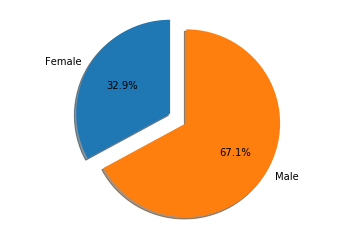

In [100]:
plt.figure(figsize=(10,6), dpi=80)

labels = 'Female', 'Male'
sizes = Individual_grouped_gender['count']  

explode = (0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs') it show that slice a bit outside of the main pie

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

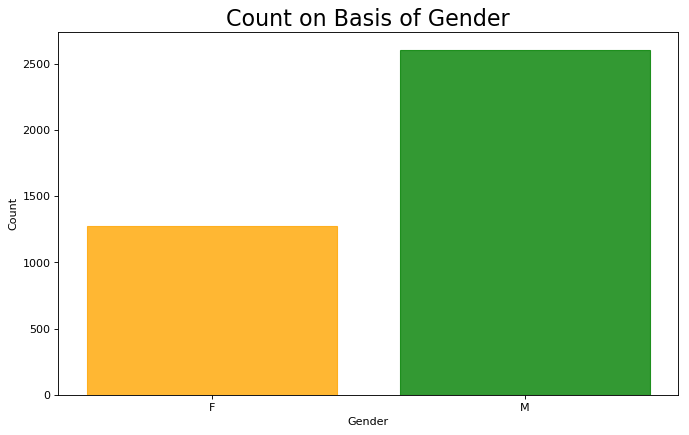

In [108]:
plt.figure(figsize=(10,6), dpi=80)

bar_list = plt.bar(Individual_grouped_gender['gender'],
       Individual_grouped_gender['count'], align='center', alpha=0.8)

bar_list[0].set_color('orange')
bar_list[1].set_color('green')

plt.ylabel('Count')
plt.xlabel('Gender')
plt.title('Count on Basis of Gender', size=20)

plt.show()

## Progression of Case Count in India

Now we will analyse the progress of the cases in India and then see which states are being able to flaten the curve.

For doing this analysis, I had to modify the dataset a bit. I grouped the data on the basis of the diagnosed data feature so that I had a count of number of cases detected each day throughout India. I followed this up by doing a cumulative sum of this feature and adding it to a new column.

In [117]:
Individuals_grouped_date = IndividualCases_df.groupby('diagnosed_date')
Individuals_grouped_date = pd.DataFrame(Individuals_grouped_date.size().reset_index(name = "count"))
Individuals_grouped_date[['Day','Month','Year']] = Individuals_grouped_date.diagnosed_date.apply( 
   lambda x: pd.Series(str(x).split("/")))
Individuals_grouped_date.sort_values(by=['Year','Month','Day'], inplace = True, ascending = True)
Individuals_grouped_date.reset_index(inplace = True)
Individuals_grouped_date['Cumulative Count'] = Individuals_grouped_date['count'].cumsum()
Individuals_grouped_date = Individuals_grouped_date.drop(['index', 'Day', 'Month', 'Year'], axis = 1)

In [120]:
# Wathching the head of this new data frame
Individuals_grouped_date.head()

,diagnosed_date,count,Cumulative Count
0,30/01/2020,1,1
1,02/02/2020,1,2
2,03/02/2020,1,3
3,02/03/2020,2,5
4,03/03/2020,1,6


In [119]:
# Wathching the tail of this new data frame
Individuals_grouped_date.tail()

,diagnosed_date,count,Cumulative Count
48,16/04/2020,1061,13431
49,17/04/2020,922,14353
50,18/04/2020,1371,15724
51,19/04/2020,1580,17304
52,20/04/2020,728,18032


Here we see that we have got data from 30/01/29 upto 20/04/20 with toal of 18032 cases.
e notice that the dataset contains data from 30th January but does not contain data in between since no cases were detected in that period. For the sake of continuity, I decided to assume 2nd March 2020 as Day 1 since we have data for every day since then.

In [121]:
Individuals_grouped_date = Individuals_grouped_date.iloc[3:]
Individuals_grouped_date.reset_index(inplace = True)
Individuals_grouped_date.columns = ['Day Number', 'diagnosed_date', 'count', 'Cumulative Count']
Individuals_grouped_date['Day Number'] = Individuals_grouped_date['Day Number'] - 2
Individuals_grouped_date

,Day Number,diagnosed_date,count,Cumulative Count
0,1,02/03/2020,2,5
1,2,03/03/2020,1,6
2,3,04/03/2020,22,28
3,4,05/03/2020,2,30
4,5,06/03/2020,1,31
5,6,07/03/2020,3,34
6,7,08/03/2020,5,39
7,8,09/03/2020,9,48
8,9,10/03/2020,15,63
9,10,11/03/2020,8,71


**Now we arre gona plot this data see the trend in India**

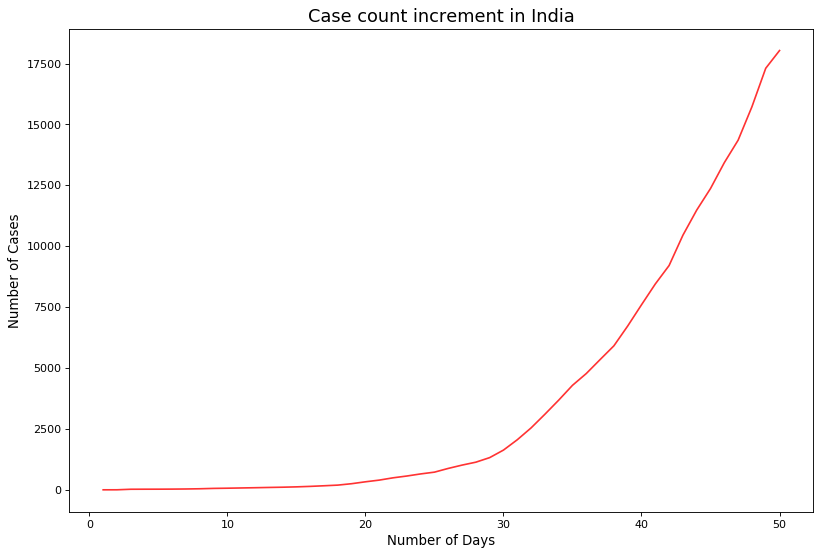

In [124]:
plt.figure(figsize=(12,8), dpi=80)
plt.plot(Individuals_grouped_date['Day Number'], Individuals_grouped_date['Cumulative Count'], color="red", alpha = 0.8)
plt.xlabel('Number of Days', size = 12)
plt.ylabel('Number of Cases', size = 12)
plt.title('Case count increment in India', size=16)
plt.show()

**We can see that rise was steady till 20th day and after that it rise exponentialy from 30th day mark.**

After that their are no signs of flatenning.

Now i will processthe data to analyse the state wise increment in cases.

**1. For Maharashtra**

In [127]:
maharashtra = CovidIndia_df[CovidIndia_df['State/UnionTerritory'] == "Maharashtra"]
maharashtra.head()
maharashtra.reset_index(inplace = True)

maharashtra = maharashtra.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'],  axis = 1)

maharashtra.reset_index(inplace = True)

maharashtra.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']

maharashtra['Day Count'] = maharashtra['Day Count'] + 8

missing_values = pd.DataFrame({"Day Count": [x for x in range(1,8)],
                  "Date": ["0"+str(x)+"/03/20" for x in range(2,9)],
                  "State/UnionTerritory": ["Maharashtra"]*7,
                  "Deaths": [0]*7,
                  "Confirmed": [0]*7})

maharashtra = maharashtra.append(missing_values, ignore_index = True)

maharashtra = maharashtra.sort_values(by="Day Count", ascending = True)

In [135]:
maharashtra.head()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
48,1,02/03/20,Maharashtra,0,0
49,2,03/03/20,Maharashtra,0,0
50,3,04/03/20,Maharashtra,0,0
51,4,05/03/20,Maharashtra,0,0
52,5,06/03/20,Maharashtra,0,0


In [136]:
maharashtra.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
43,51,21/04/20,Maharashtra,232,4669
44,52,22/04/20,Maharashtra,251,5221
45,53,23/04/20,Maharashtra,269,5652
46,54,24/04/20,Maharashtra,283,6430
47,55,25/04/20,Maharashtra,301,6817


In [137]:
maharashtra.shape

(55, 5)

**2. Now for Delhi**

In [134]:
delhi = CovidIndia_df[CovidIndia_df['State/UnionTerritory'] == "Delhi"]

delhi.reset_index(inplace = True)

delhi = delhi.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)

delhi.reset_index(inplace = True)

delhi.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']

delhi['Day Count'] = delhi['Day Count'] + 1


In [138]:
delhi.head()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Delhi,0,1
1,2,03/03/20,Delhi,0,1
2,3,04/03/20,Delhi,0,1
3,4,05/03/20,Delhi,0,2
4,5,06/03/20,Delhi,0,3


In [139]:
delhi.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
50,51,21/04/20,Delhi,47,2081
51,52,22/04/20,Delhi,47,2156
52,53,23/04/20,Delhi,48,2248
53,54,24/04/20,Delhi,50,2376
54,55,25/04/20,Delhi,53,2514


In [140]:
delhi.shape

(55, 5)

**3. Now for Rajasthan**

In [141]:
rajasthan = CovidIndia_df[CovidIndia_df['State/UnionTerritory'] == "Rajasthan"]

rajasthan.reset_index(inplace = True)

rajasthan = rajasthan.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)

rajasthan.reset_index(inplace = True)

rajasthan.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']

rajasthan['Day Count'] = rajasthan['Day Count'] + 2

missing_values = pd.DataFrame({"Day Count": [1],
                           "Date": ["02/03/20"],
                           "State/UnionTerritory": ["Rajasthan"],
                           "Deaths": [0],
                           "Confirmed": [0]})

rajasthan = rajasthan.append(missing_values, ignore_index = True)

rajasthan = rajasthan.sort_values(by="Day Count", ascending = True)

rajasthan.reset_index(drop=True, inplace=True)

In [143]:
rajasthan.head()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Rajasthan,0,0
1,2,03/03/20,Rajasthan,0,1
2,3,04/03/20,Rajasthan,0,15
3,4,05/03/20,Rajasthan,0,15
4,5,06/03/20,Rajasthan,0,15


In [145]:
rajasthan.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
50,51,21/04/20,Rajasthan,25,1576
51,52,22/04/20,Rajasthan,25,1801
52,53,23/04/20,Rajasthan,27,1890
53,54,24/04/20,Rajasthan,27,1964
54,55,25/04/20,Rajasthan,27,2034


In [146]:
rajasthan.shape

(55, 5)

**4. Now for Gujrat**

In [149]:
gujarat = CovidIndia_df[CovidIndia_df['State/UnionTerritory'] == "Gujarat"]

gujarat.reset_index(inplace = True)

gujarat = gujarat.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)

gujarat.reset_index(inplace = True)

gujarat.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']

gujarat['Day Count'] = gujarat['Day Count'] + 19

missing_values = pd.DataFrame({"Day Count": [x for x in range(1,19)],
                           "Date": [("0" + str(x) if x < 10 else str(x))+"/03/20" for x in range(2,20)],
                           "State/UnionTerritory": ["Gujarat"]*18,
                           "Deaths": [0]*18,
                           "Confirmed": [0]*18})

gujarat = gujarat.append(missing_values, ignore_index = True)

gujarat = gujarat.sort_values(by="Day Count", ascending = True)

gujarat.reset_index(drop=True, inplace=True)

In [151]:
gujarat.head()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Gujarat,0,0
1,2,03/03/20,Gujarat,0,0
2,3,04/03/20,Gujarat,0,0
3,4,05/03/20,Gujarat,0,0
4,5,06/03/20,Gujarat,0,0


In [152]:
gujarat.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
50,51,21/04/20,Gujarat,77,2066
51,52,22/04/20,Gujarat,95,2272
52,53,23/04/20,Gujarat,103,2407
53,54,24/04/20,Gujarat,112,2624
54,55,25/04/20,Gujarat,127,2815


In [153]:
gujarat.shape

(55, 5)

**5. Now for Uttar Pradesh**

In [157]:
up = CovidIndia_df[CovidIndia_df['State/UnionTerritory'] == "Uttar Pradesh"]

up.reset_index(inplace = True)

up = up.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)

up.reset_index(inplace = True)

up.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']

up['Day Count'] = up['Day Count'] + 19

missing_values = pd.DataFrame({"Day Count": [x for x in range(1,19)],
                           "Date": [("0" + str(x) if x < 10 else str(x))+"/03/20" for x in range(2,20)],
                           "State/UnionTerritory": ["Uttar Pradesh"]*18,
                           "Deaths": [0]*18,
                           "Confirmed": [0]*18})

up = up.append(missing_values, ignore_index = True)

up = up.sort_values(by="Day Count", ascending = True)

up.reset_index(drop=True, inplace=True)

In [158]:
up.head()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Uttar Pradesh,0,0
1,2,03/03/20,Uttar Pradesh,0,0
2,3,04/03/20,Uttar Pradesh,0,0
3,4,05/03/20,Uttar Pradesh,0,0
4,5,06/03/20,Uttar Pradesh,0,0


In [159]:
up.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
66,67,21/04/20,Uttar Pradesh,20,1294
67,68,22/04/20,Uttar Pradesh,21,1412
68,69,23/04/20,Uttar Pradesh,21,1509
69,70,24/04/20,Uttar Pradesh,24,1604
70,71,25/04/20,Uttar Pradesh,26,1778


In [160]:
up.shape

(71, 5)

**6. Now for Kerala** 

In [161]:
kerala = CovidIndia_df[CovidIndia_df['State/UnionTerritory'] == "Kerala"]

kerala = kerala.iloc[32:]

kerala.reset_index(inplace = True)

kerala = kerala.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)

kerala.reset_index(inplace = True)

kerala.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']

kerala['Day Count'] = kerala['Day Count'] + 1

In [162]:
kerala.head()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Kerala,0,3
1,2,03/03/20,Kerala,0,3
2,3,04/03/20,Kerala,0,3
3,4,05/03/20,Kerala,0,3
4,5,06/03/20,Kerala,0,3


In [163]:
kerala.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
50,51,21/04/20,Kerala,3,408
51,52,22/04/20,Kerala,3,427
52,53,23/04/20,Kerala,3,438
53,54,24/04/20,Kerala,3,448
54,55,25/04/20,Kerala,4,451


In [164]:
kerala.shape

(55, 5)

**Let us know Visualise the trend.**

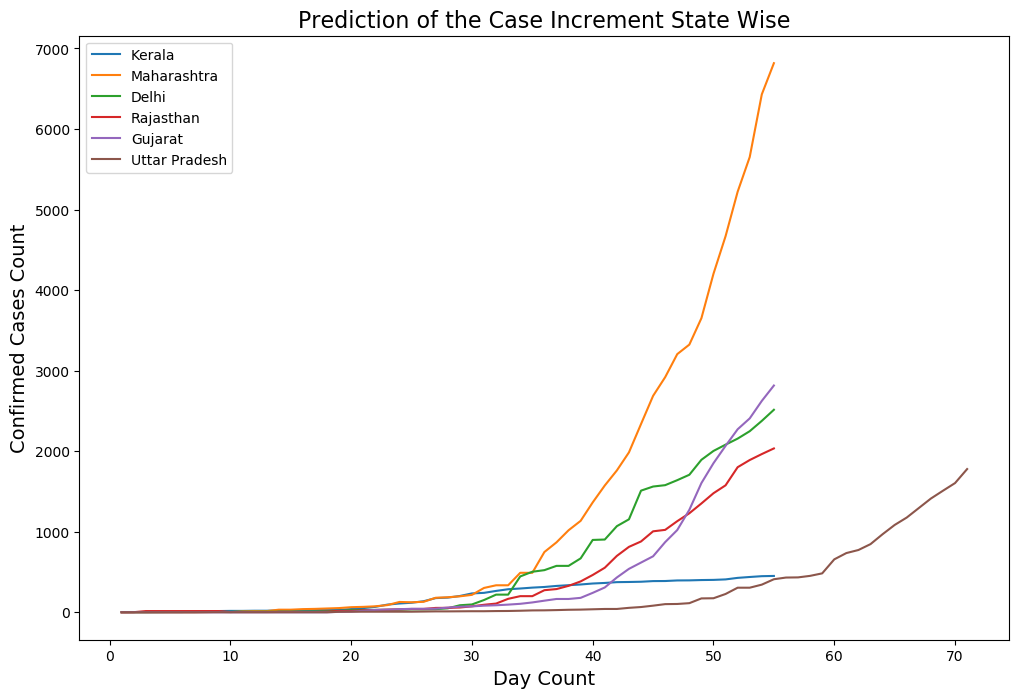

In [171]:
plt.figure(figsize=(12,8), dpi=100)

plt.plot(kerala['Day Count'], kerala['Confirmed'])

plt.plot(maharashtra['Day Count'], maharashtra['Confirmed'])

plt.plot(delhi['Day Count'], delhi['Confirmed'])

plt.plot(rajasthan['Day Count'], rajasthan['Confirmed'])

plt.plot(gujarat['Day Count'], gujarat['Confirmed'])

plt.plot(up['Day Count'], up['Confirmed'])

plt.legend(['Kerala', 'Maharashtra', 'Delhi', 'Rajasthan', 'Gujarat', 'Uttar Pradesh'], loc='upper left')

plt.xlabel('Day Count', size=14)
plt.ylabel('Confirmed Cases Count', size=14)

plt.title('Prediction of the Case Increment State Wise', size = 16)

plt.show()

So we can see that kerala is only states which show flatening and all the other states graph is increasing and no sign of decreasing for another month.

All the states should learn and follow from the Kerala Governments Containment Measures.

We should follow kerala Model!


All this data is taken from the Ministry Of Health and Family Welfare.

**The Data sets are Available on my Github Repository: https://github.com/AbhijeetSrivastav/Covid-Analysis **

**Follow us on IG: techneophyte **

**Follow us on Telegram using this link t.me/techneophyte or simply search techneophyte**

**Check Out our Website its under development and the categories of blog will increase as per requirment of the bloogers
https://techneophyte.wixsite.com/website-1**

**If you want to Become Blog writer on our website contact us on 9005959680 or message us on instagram id techneophyte.
You can also mail us on techneophytes@gmail.com**

**Follow us on these platforms for more such projects and courses as well as to write a blog to share your knowledge and connect to community ..this will also add value to your CV**


**Data Analysis By Tecneophyte**  

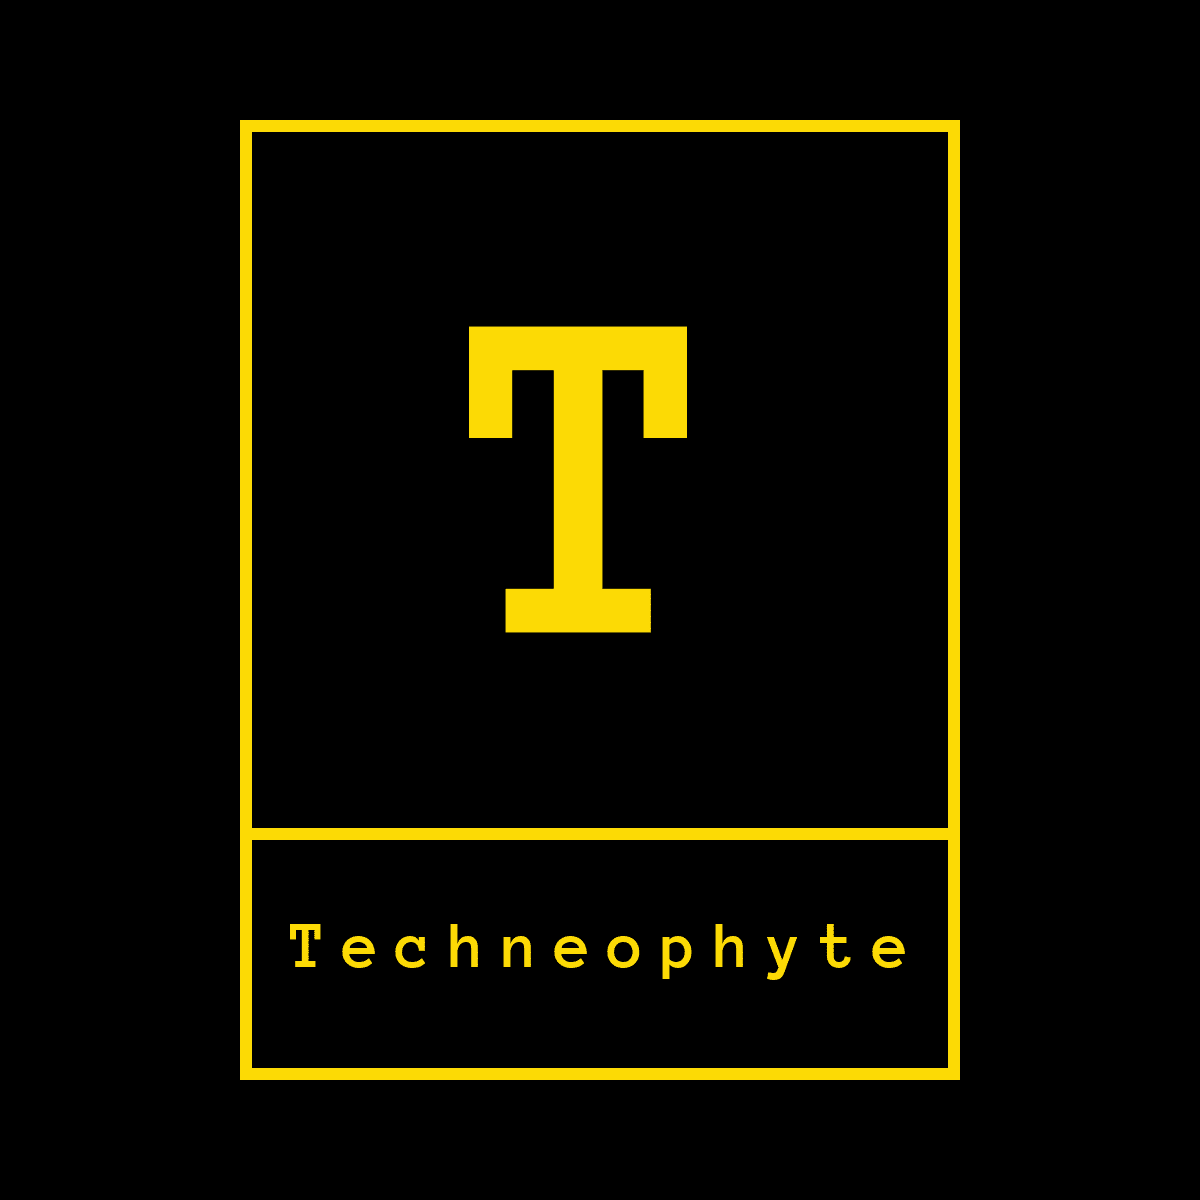